In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
fileList =[]
import glob, os
for file in glob.glob("*.txt"):
    fileList.append(file)

In [3]:
nm=1e-9
noAQs = []
noAQ = {}
AQs = []
AQ = {}
AQ2 = {} 
AQ3 = {}
noAQvals = []
noAQvals2 = []
for item in fileList:
    if item[0] == 'n':
        noAQs.append(item)
        f = open(item,'r')
        search=f.readlines()
        f.close()
        val = search[0][5:]
        val2 = search[1][5:]
        noAQ['{}'.format(item[5])] = float(val)/nm
        noAQvals.append(float(val)/nm)
        noAQvals2.append(float(val2)/nm)
    else:
        AQs.append(item)
        AQ['{}'.format(item[3])] ={}
        AQ2['{}'.format(item[3])] ={}
        AQ3['{}'.format(item[3])] ={}
        

for item in AQs:
    L,R = item.split(".")
    num1 = L[3]
    f = open(item,"r")
    search = f.readlines()
    f.close()
    val = search[0][5:]
    val2 = search[1][5:]
    val3 = search[2][8:]
    AQ['{}'.format(str(num1))]=float(val)/nm
    AQ2['{}'.format(str(num1))]=float(val2)/nm
    AQ3['{}'.format(str(num1))]=float(val3)
    
AQkeys = AQ.keys()



In [4]:
### So I want to compare noAQ to AQ with the same # of pores across all charges
print AQ
print AQ.keys()

{'3': 0.197738752095, '5': 0.164419473368, '4': 0.176505772214, '7': 0.11684078988299998, '6': 0.14550856983699997, '8': 0.09625001044119999}
['3', '5', '4', '7', '6', '8']


In [5]:
### From notebook "Priyesh_update"

D_experimental_aqp = np.mean([5.84054089e-07, 4.55903537e-07, 3.03720426e-07, 3.17304903e-07])*1e5
D_exp_aqp =[]
D_experimental = np.mean([1.34204016e-06, 8.07443611e-07, 9.38828308e-07, 1.33036245e-06])*1e5
D_exp =[]

for i in range(6):
    D_exp.append(D_experimental)
    D_exp_aqp.append(D_experimental_aqp)
    



In [6]:
xs = []
ys=[]
y2=[]
ys2 = []
y3=[]
count =1
for key in sorted(AQ.iterkeys()):
    xs.append(float(key)**2/100)
    ys.append((AQ['{}'.format(key)])/2)

z= np.polyfit(xs,ys,3)
fittedCurve = np.poly1d(z)

<Figure size 3000x2000 with 0 Axes>

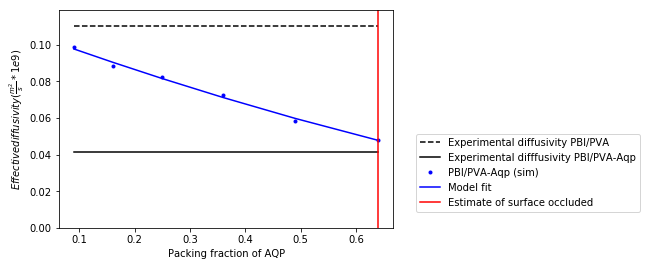

In [8]:
plt.figure(dpi=500)
fig, ax1 = plt.subplots()

ax1.plot(xs,D_exp,'k--',label="Experimental diffusivity PBI/PVA")
ax1.plot(xs,D_exp_aqp, 'k', label="Experimental difffusivity PBI/PVA-Aqp")
ax1.plot(xs,ys[:],'b.',label="PBI/PVA-Aqp (sim)")

ax1.plot(xs,fittedCurve(xs),'b',label='Model fit')
plt.ylim(0,np.max(ys)+.02)
ax1.set_ylabel(r"$Effective diffusivity ( \frac{m^2}{s} * 1e9)$")
ax1.set_xlabel("Packing fraction of AQP")
plt.axvline(x=0.64,color='r', label = "Estimate of surface occluded")

ax1.legend(bbox_to_anchor=(0., 0.05, 1.75, 0),loc=4)
fig.savefig("figure11.png", dpi=300) 






